In [9]:
import numpy as np
from pyrootmemo.fit.fit_x import GumbelFit, WeibullFit, PowerFit
from pyrootmemo.fit.fit_xy_linear import LinearFit
from pyrootmemo.fit.fit_x_binned import PowerFitBinned
from pyrootmemo.tools.helpers import units
import matplotlib.pyplot as plt

In [ ]:
# test power law for binned data
xall = np.linspace(1, 10, 6)
x = np.column_stack((xall[:-1], xall[1:]))
y = np.ones(x.shape[0])
xu = x * units('mm')
yu = y * units('mm^2')
Pu2 = PowerFitBinned(xu, yu, lower = 0.5 * units('mm'))
Pu = PowerFitBinned(xu, yu)
print(Pu.multiplier, Pu2.multiplier)
print(Pu.exponent, Pu2.exponent)
print(Pu.lower, Pu2.lower)
print(Pu.upper, Pu2.upper)
print(Pu.random(10))
print(Pu.density(np.array([1, 2, 3]) * units('mm'), cumulative = True))

0.1270510672273536 millimeter ** 2 0.07083916808689963 millimeter ** 2
-0.0720756234064388
1.1813500908995935 millimeter
9.999999996523254 millimeter
[3.333987682841392 8.845615461158138 1.3313489200075788 2.197733087755979 2.3125513501825004 6.0309370066079655 2.2690460363364835 8.823923727014808 7.072323539272525 6.021130545506363] millimeter
[0.0 0.10067593871496672 0.21966940366330048] millimeter ** 3


In [11]:
# generate some data
rng = np.random.default_rng()
x = rng.normal(10, 1, 50)
xu = x * units('mm')

In [12]:
# check linear regression
y = 5.0 + 2.0 * x + rng.normal(0, 3, len(x))
yu = y * units('MPa')
fit = LinearFit(xu, yu)
print(fit.intercept)
print(fit.gradient)

3.70591939350423 megapascal
2.1419605315892163 megapascal / millimeter


In [13]:
# test Power fit
P = PowerFit(x)
print(P.multiplier)
print(P.exponent)
print(P.lower)
print(P.upper)
print(P.random(10))
print(P.covariance())
print(P.ks_distance())

0.7266366636307514
-0.5478910363090396
7.650681313892666
12.487886224167136
[ 9.80934366 11.73927898  9.55411994 11.58468059  8.51526184  8.55960264
 10.45816457  9.56992933  9.19038521  7.81148305]
1.0021829710432408
0.2030726659294163


In [14]:
# test Power fit with units
Pu = PowerFit(xu)
print(Pu.multiplier)
print(Pu.exponent)
print(Pu.lower)
print(Pu.upper)
print(Pu.random(10))
print(Pu.covariance())
print(Pu.covariance(method = 'bootstrap'))
print(Pu.ks_distance())
print(Pu.density())
print(Pu.density(cumulative = True))

plt.hist(xu, density = True)
xp = np.linspace(Pu.lower, Pu.upper, 100)
yp = Pu.density(xp)
plt.plot(xp, yp, '-')

TypeError: DimensionalityError.__init__() missing 1 required positional argument: 'units2'

9.412382154113697 millimeter
0.9567187143159136 millimeter
[7.903438955037496 8.352024586718574 7.971775186370404 15.50141631657894 10.2248581948433 9.406990886629897 8.55493167372799 10.562166669168679 8.873310896516578 9.508654891138162] millimeter
[0.2714504326397754 0.15572388266676956 0.31695220575559646 0.1704745745475714 0.17867409233533146 0.19843349513801334 0.1592733618020651 0.37970787829270664 0.14695502010807862 0.3552725736737828 0.28390383188092555 0.0656824597667161 0.362259762474272 0.34439509810835783 0.23460241140439483 0.18748065493732954 0.3241397546604136 0.0983961991624156 0.1998504160805229 0.20148844815513609 0.3276818265411907 0.17485161831199705 0.3711525000708459 0.10731570773645627 0.38276231129699106 0.17335096407590905 0.36280664410248264 0.2874492349489197 0.1358511994750661 0.15391079510242403 0.27182892366342676 0.1465558594965011 0.3634885619402327 0.36106091734733725 0.1566801231852482 0.22931600666410534 0.23615397295544877 0.3549430938728649 0.2615

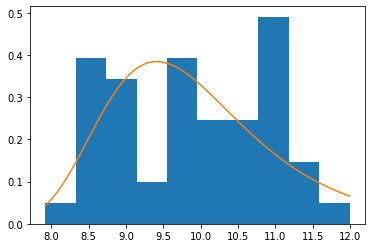

In [ ]:
# Gumbel fit with units
Gu = GumbelFit(xu)
print(Gu.location)
print(Gu.scale)
print(Gu.random(10))
print(Gu.density())
print(Gu.density(cumulative = True))
print(Gu.covariance())
print(Gu.covariance(method = 'bootstrap'))
print(Gu.ks_distance())
print(Gu.loglikelihood(deriv = 0))
print(Gu.loglikelihood(deriv = 1))
print(Gu.loglikelihood(deriv = 2))

plt.hist(xu, density = True)
xp = np.linspace(min(xu), max(xu), 100)
yp = Gu.density(xp)
plt.plot(xp, yp, '-')

In [ ]:
# Test Gumbel fit
G = GumbelFit(x)
print(G.location)
print(G.scale)
print(G.random(10))
print(G.covariance())
print(G.ks_distance())


9.412382154113697
0.9567187143159136
[ 9.68911748 10.27867276 12.25359381  9.94706181  9.56694471  9.53985674
  9.97901761  8.46893278  8.08458997 10.09833327]
[[0.02055657 0.00491707]
 [0.00491707 0.01074388]]
0.10344841290089668


In [ ]:
# test Weibull fit
W = WeibullFit(x)
print(W.shape)
print(W.scale)
print(W.random(10))
print(W.covariance())
print(W.ks_distance())
print(W.density())

10.92770232271225
10.397593176713968
[ 9.71388123 11.40900878  9.54029388  9.10877058 11.03098747 10.6589431
  9.11471518  9.28562013 11.16188688  9.98585834]
[[0.65173872 0.02833898]
 [0.02833898 0.00880807]]
0.11026185254597737
[0.38809984 0.27124714 0.378459   0.30031641 0.31447876 0.34291569
 0.11122393 0.30770369 0.25179124 0.34882053 0.16326881 0.03687362
 0.34028323 0.35972884 0.37592593 0.12158179 0.37457732 0.12118481
 0.34465643 0.12690993 0.18990528 0.30805278 0.32673072 0.14690033
 0.29640203 0.1163426  0.22231709 0.38763816 0.22493524 0.26735567
 0.1571509  0.25086792 0.22317454 0.34185432 0.1102894  0.13803597
 0.3768443  0.34918953 0.15221289 0.236814   0.38324374 0.06708205
 0.24207779 0.21925895 0.37970734 0.33577094 0.29084778 0.21369825
 0.17148642 0.36608241]


10.92770232271225
10.397593176713968 millimeter
[7.727152974913382 10.228711705587196 11.697664592004902 7.427576040112663 10.548040126428948 9.646488887504333 10.570295826434425 10.620645798262109 10.704208894930977 9.077062443191007] millimeter
0.11026185254597737
[0.38809984334753245 0.27124713999578065 0.3784589994028837 0.3003164141345871 0.31447876484537196 0.34291568533858374 0.11122392755730459 0.3077036944206714 0.2517912425409563 0.34882052748412706 0.1632688083804877 0.036873617807036956 0.3402832314438326 0.35972884210976586 0.3759259269492876 0.12158179364746427 0.3745773207144105 0.12118481251781177 0.3446564335875063 0.12690992739622411 0.1899052798217684 0.308052784641825 0.32673072485833227 0.14690032925681817 0.29640202845183106 0.11634259686518961 0.22231708826976215 0.3876381573832495 0.22493524176810997 0.26735566830607504 0.15715090040379007 0.2508679181214085 0.22317453688435285 0.3418543183427959 0.11028940135772886 0.13803597465671705 0.37684430388240814 0.3491

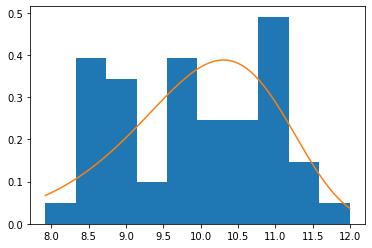

In [ ]:
# Weibull with units
Wu = WeibullFit(xu)
print(Wu.shape)
print(Wu.scale)
print(Wu.random(10))
print(Wu.ks_distance())
print(Wu.density())
print(Wu.density(cumulative = True))
print(Wu.loglikelihood(deriv = 0))
print(Wu.loglikelihood(deriv = 1))
print(Wu.loglikelihood(deriv = 2))
print(Wu.covariance())

plt.hist(xu, density = True)
xp = np.linspace(min(xu), max(xu), 100)
yp = Wu.density(xp)
plt.plot(xp, yp, '-')